In [ ]:
train_ids = next(os.walk(TRAIN_PATH))[2]
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
missing_count = 0
print('Getting train images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_+''
    try:
        img = imread(path)
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_train[n-missing_count] = img
    except:
        print(" Problem with: "+path)
        missing_count += 1

X_train = X_train.astype('float32') / 255.
print("Total missing: "+ str(missing_count))

Getting train images ... 


100%|██████████| 1107/1107 [04:44<00:00,  3.89it/s]


Total missing: 0


In [ ]:
filenames=  os.listdir('./dataset/dataset_updated/training_set/engraving')
Label = []
for i in filenames:
  Label.append('engraving')

filenames_x=  os.listdir('./dataset/dataset_updated/training_set/painting')
for i in filenames_x:
  filenames.append(i)
  Label.append('painting')

filenames_x=  os.listdir('./dataset/dataset_updated/training_set/iconography')  
for i in filenames_x:
  filenames.append(i)
  Label.append('iconography')

filenames_x=  os.listdir('./dataset/dataset_updated/training_set/sculpture')
for i in filenames_x:
  filenames.append(i)
  Label.append('sculpture')

filenames_x=  os.listdir('./dataset/dataset_updated/training_set/drawings')
for i in filenames_x:
  filenames.append(i)
  Label.append('drawings')

  

In [ ]:
train_data = pd.DataFrame({'Image':filenames,'Label':Label})
train_data.head()
#data.size

In [ ]:
filenames=  os.listdir('./dataset/dataset_updated/validation_set/engraving')
Label = []
for i in filenames:
  Label.append('engraving')

filenames_x=  os.listdir('./dataset/dataset_updated/validation_set/painting')
for i in filenames_x:
  filenames.append(i)
  Label.append('painting')

filenames_x=  os.listdir('./dataset/dataset_updated/validation_set/iconography')  
for i in filenames_x:
  filenames.append(i)
  Label.append('iconography')

filenames_x=  os.listdir('./dataset/dataset_updated/validation_set/sculpture')
for i in filenames_x:
  filenames.append(i)
  Label.append('sculpture')

filenames_x=  os.listdir('./dataset/dataset_updated/validation_set/drawings')
for i in filenames_x:
  filenames.append(i)
  Label.append('drawings')

In [ ]:
validation_data_ = pd.DataFrame({'Image':filenames,'Label':Label})
validation_data_.head()
#data.size

In [ ]:
def get_generator_from_dataframe(directory_path, dataframe, batch_size_):
    #preprocessing:
    data_batch_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                            shear_range=0.2,
                                                                            zoom_range=0.2,
                                                                            horizontal_flip=True)
    data_batch_generator = data_batch_generator.flow_from_dataframe(directory= directory_path,
                                                                    dataframe=dataframe,
                                                                    color_mode="rgb",
                                                                    class_mode="categorical",
                                                                    shuffle=True,
                                                                    x_col='Image',
                                                                    y_col='Label',
                                                                    seed=42,
                                                                    batch_size=batch_size_,
                                                                    target_size = (IMG_HEIGHT,IMG_WIDTH)
                                                                    )

    return data_batch_generator



In [1]:
from google.colab import drive
import os
drive.mount('/gdrive',force_remount=True)

if("code.ipynb" in os.listdir('/gdrive/MyDrive/MTP')):
    print("Successfully Loaded Lab Directory")
    os.chdir('/gdrive/MyDrive/MTP')

Mounted at /gdrive
Successfully Loaded Lab Directory


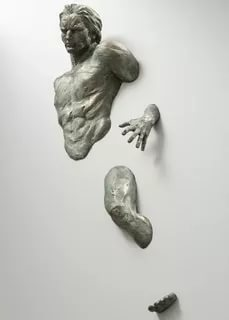

In [2]:
from IPython.display import Image

Image("./dataset/dataset_updated/training_set/sculpture/i108.jpeg")

In [3]:
import sys
import random
import os
import warnings
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
import skimage
from PIL import Image
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.util import crop, pad
from skimage.morphology import label
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb
from sklearn.model_selection import train_test_split
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.models import Model, load_model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, UpSampling2D, RepeatVector, Reshape
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [4]:
train_path = './dataset/dataset_updated/training_set/'
test_path = './dataset/dataset_updated/validation_set/'

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
INPUT_SHAPE=(IMG_HEIGHT, IMG_WIDTH, 1)

In [5]:
def get_generator_from_dir(directory_path, batch_size_):
    data_batch_generator = tf.keras.preprocessing.image.ImageDataGenerator()
    #rescale=1/255,
    #                                                                        shear_range=0.2,
    #                                                                        zoom_range=0.2,
    #                                                                        horizontal_flip=True)
    data_batch_generator = data_batch_generator.flow_from_directory(directory= directory_path,
                                                                    color_mode="rgb",
                                                                    class_mode="categorical",
                                                                    shuffle=True,
                                                                    seed=42,
                                                                    batch_size=batch_size_,
                                                                    target_size = (IMG_HEIGHT,IMG_WIDTH)
                                                                    )

    return data_batch_generator



In [6]:
labels= os.listdir('./dataset/dataset_updated/training_set/') 
labels

['drawings', 'sculpture', 'iconography', 'painting', 'engraving']

In [ ]:
for (x, y, z) in os.walk('./dataset/dataset_updated/training_set/'):
  print("The root is: ")
  print(x)
  print("The directories are: ")
  print(y)
  print("The files are: ")
  print(z)
  print('--------------------------------')

The root is: 
./dataset/dataset_updated/training_set/
The directories are: 
['drawings', 'sculpture', 'iconography', 'painting', 'engraving']
The files are: 
[]
--------------------------------
The root is: 
./dataset/dataset_updated/training_set/drawings
The directories are: 
[]
The files are: 
['i - 1030.jpeg', 'i - 1059.jpeg', 'i - 1080.jpeg', 'i - 1039.jpeg', 'i - 1031.jpeg', 'i - 1079.jpeg', 'i - 1069.jpeg', 'i - 1035.jpeg', 'i - 1049.jpeg', 'i - 1067.jpeg', 'i - 1070.jpeg', 'i - 1071.jpeg', 'i - 1075.jpeg', 'i - 1073.jpeg', 'i - 1054.jpeg', 'i - 1078.jpeg', 'i - 105.jpeg', 'i - 1055.jpeg', 'i - 1056.jpeg', 'i - 1047.jpeg', 'i - 1074.jpeg', 'i - 1065.jpeg', 'i - 1043.jpeg', 'i - 1058.jpeg', 'i - 1081.jpeg', 'i - 1033.jpeg', 'i - 1076.jpeg', 'i - 1060.jpeg', 'i - 1040.jpeg', 'i - 1048.jpeg', 'i - 1045.jpeg', 'i - 1066.jpeg', 'i - 1062.jpeg', 'i - 1046.jpeg', 'i - 1052.jpeg', 'i - 1037.jpeg', 'i - 1042.jpeg', 'i - 1082.jpeg', 'i - 1032.jpeg', 'i - 1038.jpeg', 'i - 106.jpeg', 'i - 10

In [ ]:
#train_generator = get_generator_from_dataframe('./dataset/dataset_updated/training_set/iconography', train_data,144)
#validation_generator = get_generator_from_dataframe('./dataset/dataset_updated/validation_set/iconography', validation_data_,144)

train_batches = get_generator_from_dir(train_path,32)
validation_batches= get_generator_from_dir(test_path,32)

Found 7676 images belonging to 5 classes.
Found 850 images belonging to 5 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(IMG_HEIGHT,IMG_WIDTH,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_batches,steps_per_epoch=20,epochs=50,
                    validation_data=validation_batches, validation_steps=20)

Epoch 1/50
20/20 [==============================] - 777s 40s/step - loss: 486.2863 - accuracy: 0.2547 - val_loss: 1.5906 - val_accuracy: 0.2844
Epoch 2/50
20/20 [==============================] - 432s 22s/step - loss: 1.7121 - accuracy: 0.3156 - val_loss: 1.5947 - val_accuracy: 0.3000
Epoch 3/50
20/20 [==============================] - 333s 17s/step - loss: 1.4308 - accuracy: 0.3906 - val_loss: 1.5698 - val_accuracy: 0.3313
Epoch 4/50
20/20 [==============================] - 302s 15s/step - loss: 1.3639 - accuracy: 0.4781 - val_loss: 1.5418 - val_accuracy: 0.3328
Epoch 5/50
20/20 [==============================] - 291s 14s/step - loss: 1.3926 - accuracy: 0.4625 - val_loss: 1.4977 - val_accuracy: 0.3781
Epoch 6/50
20/20 [==============================] - 247s 12s/step - loss: 1.2675 - accuracy: 0.4922 - val_loss: 1.4790 - val_accuracy: 0.3844
Epoch 7/50
20/20 [==============================] - 236s 12s/step - loss: 1.2652 - accuracy: 0.4531 - val_loss: 1.5007 - val_accuracy: 0.3672
Epoc

In [ ]:
def build_model(dropout_probability = 0,LR=1e-2):
    
    # Creating a Keras sequential model
    model = tf.keras.models.Sequential()
    
    # Adding layers 
    model.add(tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.Dense(256, activation='tanh',kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(256, activation='relu',kernel_initializer='glorot_uniform'))
    model.add(tf.keras.layers.Dense(256, activation='tanh',kernel_initializer='he_uniform',))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(5,activation='softmax'))
    
    # Optimizers, loss function and performance metrics
    opt = tf.keras.optimizers.Adam(learning_rate=LR)
    cat_loss = tf.keras.losses.CategoricalCrossentropy()
    acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]
    
    # Compiling the model
    model.compile(optimizer=opt, loss=cat_loss, metrics=acc_metrics)
    
    return model

model_2 = build_model(0 , 1e-2)
trained_model = model_2.fit(train_batches ,steps_per_epoch=20,epochs=50, validation_steps=20,  validation_data = validation_batches)

Epoch 1/50
20/20 [==============================] - 307s 16s/step - loss: 2.3037 - categorical_accuracy: 0.2453 - val_loss: 1.5955 - val_categorical_accuracy: 0.2578
Epoch 2/50
20/20 [==============================] - 163s 8s/step - loss: 1.8067 - categorical_accuracy: 0.2578 - val_loss: 1.6818 - val_categorical_accuracy: 0.2812
Epoch 3/50
20/20 [==============================] - 125s 6s/step - loss: 1.6936 - categorical_accuracy: 0.2453 - val_loss: 1.6635 - val_categorical_accuracy: 0.2859
Epoch 4/50
20/20 [==============================] - 104s 5s/step - loss: 1.6610 - categorical_accuracy: 0.2625 - val_loss: 1.5733 - val_categorical_accuracy: 0.2500
Epoch 5/50
20/20 [==============================] - 100s 5s/step - loss: 1.7049 - categorical_accuracy: 0.2484 - val_loss: 1.7123 - val_categorical_accuracy: 0.2672
Epoch 6/50
20/20 [==============================] - 88s 4s/step - loss: 1.7542 - categorical_accuracy: 0.2484 - val_loss: 1.6112 - val_categorical_accuracy: 0.2203
Epoch 7/50

In [10]:
def get_generator_from_dir2(directory_path, batch_size_):
    data_batch_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                            shear_range=0.2,
                                                                            zoom_range=0.2,
                                                                            horizontal_flip=True)
    data_batch_generator = data_batch_generator.flow_from_directory(directory= directory_path,
                                                                    color_mode="rgb",
                                                                    class_mode="categorical",
                                                                    shuffle=True,
                                                                    #seed=42,
                                                                    batch_size=batch_size_,
                                                                    target_size = (IMG_HEIGHT,IMG_WIDTH)
                                                                    )

    return data_batch_generator


def my_gen(gen):
    data, labels = next(gen)
    while data:
        try:
            data, labels = next(gen)
            yield data, labels
        except:
            pass

In [11]:
#train_generator = get_generator_from_dataframe('./dataset/dataset_updated/training_set/iconography', train_data,144)
#validation_generator = get_generator_from_dataframe('./dataset/dataset_updated/validation_set/iconography', validation_data_,144)

train_batches_2 = my_gen(get_generator_from_dir2(train_path,32))
validation_batches_2 = my_gen(get_generator_from_dir2(test_path,32))

Found 7676 images belonging to 5 classes.
Found 850 images belonging to 5 classes.


In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(IMG_HEIGHT,IMG_WIDTH,3),activation='relu'))  #change imgheight width
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_batches_2 ,steps_per_epoch=20,epochs=20,validation_data=validation_batches_2, validation_steps=20)

ValueError: ignored